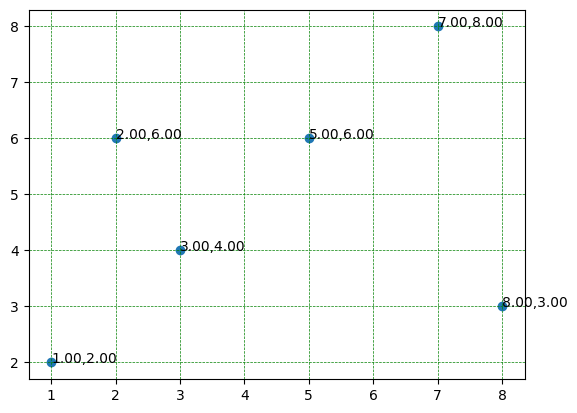

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 5, 7, 8]
y = [2, 6, 4, 6, 8, 3]

for xy in zip(x,y):
    # xy ghi sát để tạo thành tupple
    # annotate : thêm chú thích vào biểu đồ
    # '%.2f,%.2f' % xy áp dụng định dạng cho x,y
    plt.annotate('%.2f,%.2f' % xy,xy=xy)    
plt.scatter(x, y)
plt.grid(color='green', linestyle ='--',linewidth = 0.5)
plt.show()

In [2]:
class TreeNode:
    def __init__(self, median_point) -> None:
        self.median = median_point
        self.left = None
        self.right = None
        

In [3]:
import math
class kd_tree():
    def __init__(self) -> None:
        self.root = None

    def insert(self, points_list, depth = 0):
        self.root = self._insert(points_list, depth)

    def _insert(self, points_list, depth):

        if len(points_list) == 0:
            return
        
        # Xác định trục dựa trên độ sâu
        axis = depth % 2
        # Sắp xếp danh sách điểm theo trục
        points_list.sort(key=lambda x: x[axis])

        # Chọn điểm median
        median_index = len(points_list) // 2
        median_point = points_list[median_index]
    
        # Tạo node mới với điểm median
        node = TreeNode(median_point=median_point)

        # Đệ quy chèn các điểm bên trái và bên phải của điểm median
        node.left = self._insert(points_list[: median_index], depth + 1)
        node.right = self._insert(points_list[median_index + 1 :] , depth=depth+1)

        return node
    def lookup(self, points):
        return self._lookup(self.root, points=points , depth=0 , best_points = None, distance_min=float('inf'))
    
    def _lookup(self, node, points,depth, best_points , distance_min):
        if node == None:
            return (distance_min , best_points)  # Trả về điểm tốt nhất và khoảng cách nếu node hiện tại là None(tại vì chạy đến cuối tree rồi)
        
        # Xác định trục dựa trên độ sâu
        axis = depth % 2
        point = points[axis]
        median_point = node.median

        # Tính khoảng cách Euclidean từ điểm hiện tại tới điểm cho trước
        distance = math.sqrt((node.median[0] - points[0])**2 + (node.median[1] - points[1])**2)

         # Cập nhật điểm tốt nhất và khoảng cách nếu tìm thấy khoảng cách nhỏ hơn
        if distance_min > distance:
            distance_min = distance
            best_points = median_point
        

         # Quyết định đi xuống nhánh con bên trái hoặc bên phải dựa trên trục và điểm
        if point < median_point[axis]:
            distance_min,best_points = self._lookup(node.left, points=points,depth=depth + 1, distance_min=distance_min , best_points=best_points)
            if (point - median_point[axis]) ** 2 < distance_min:
                distance_min, best_points = self._lookup(node.right, points=points, depth=depth + 1, distance_min=distance_min, best_points=best_points)
        else:
            distance_min,best_points = self._lookup(node.right, points, depth + 1, distance_min=distance_min, best_points=best_points)
            if (point - median_point[axis]) ** 2 < distance_min:
                distance_min, best_points = self._lookup(node.left, points=points, depth=depth + 1, distance_min=distance_min, best_points=best_points)
        
        return (distance_min, best_points)

In [5]:

x = [1, 2, 3, 5, 7, 8]
y = [2, 6, 4, 6, 8, 3]

kdt = kd_tree()
list_points = list(zip(x, y))
kdt.insert(list_points)

key = (6, 5)
result = kdt.lookup(key)

print(result)

(1.4142135623730951, (5, 6))
